In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat 
from datetime import datetime, date, time
import seaborn as sns
import datetime
from datetime import datetime
import time

In [7]:

def cleaning(data, cut=2e-8, nsigma=3):
    #data cleaning of independent events
    df = data[data['time']<cut]

    #gaussian fit
    from scipy import stats
    mynorm3=stats.norm.fit(df[df['channel']==3].time)
    mynorm4=stats.norm.fit(df[df['channel']==4].time)

    print('Fitting...')
    print('channel 3 \t mean: {}, std: {}'.format(mynorm3[0], mynorm3[1]))
    print('channel 4 \t mean: {}, std: {}'.format(mynorm4[0], mynorm4[1]))

    if mynorm3[0]<mynorm4[0]:
        ll_cut = mynorm3[0]-nsigma*mynorm3[1]
        lr_cut = mynorm3[0]+nsigma*mynorm3[1]
        rr_cut = mynorm4[0]+nsigma*mynorm4[1]
        rl_cut = mynorm4[0]-nsigma*mynorm4[1]
    else:
        ll_cut = mynorm4[0]-nsigma*mynorm4[1]
        lr_cut = mynorm4[0]+nsigma*mynorm4[1]
        rr_cut = mynorm3[0]+nsigma*mynorm3[1]
        rl_cut = mynorm3[0]-nsigma*mynorm3[1]

    print('Cutting...')
    m1 = df['time']>ll_cut 
    m2 = df['time']<lr_cut 
    mask1 = m1 & m2
    m1 = df['time']>rl_cut
    m2 = df['time']<rr_cut
    mask2 = m1 & m2
    mask = mask1 | mask2
    df = df[mask]
    return df

def plot_histo(df, path):
    #histogram of coincidence events
    fig,ax=plt.subplots(figsize=(10,6))
    sns.set_theme(style='white', font_scale=2)

    sns.histplot(data = df, x = 'time', ax=ax, hue = 'channel', alpha=0.9, lw=0,
                bins=200, palette='Dark2', stat='density')
                
    ax.set_xlabel(r'$\Delta t$ [s]')
    figpath = path[:-4]+'_hist.pdf'
    fig.savefig(figpath, bbox_inches='tight')


In [8]:
def main(path, cut, nsigma):
    """
    Read the data from the .mat file given as argument and find the coincidences.
    coincidences are saved in a .txt file in the coincidences folder.
    """
    import os
    print('Uploading...')

    if path[:13] != 'coincidences/': raise ValueError('path must be in coincidences folder')
    df = pd.read_csv(path, usecols=['time', 'channel'], dtype={'time': np.float128, 'channel': np.int64})
    clean = cleaning(df, cut, nsigma)
    plot_histo(clean, path)

    if (os.path.isdir('cleaned_data')==False):
        os.mkdir('cleaned_data')
    clean.to_csv('cleaned_data/'+path[13:-4]+'_clean.txt')

In [9]:
path = 'coincidences/d_state_measured_on_da_basis_coincidences.txt'
cut=2e-8
nsigma=2
main(path=path, cut=cut, nsigma=nsigma)

Uploading...


RuntimeError: The data contains non-finite values.

In [12]:
# plot non cleaned data

path='coincidences/mixed_state_measured_on_hv_basis_coincidences.txt'
sns.set_theme(style='white', font_scale=2)
df = pd.read_csv(path, usecols=['time', 'channel'], dtype={'time': np.float128, 'channel': np.int64})

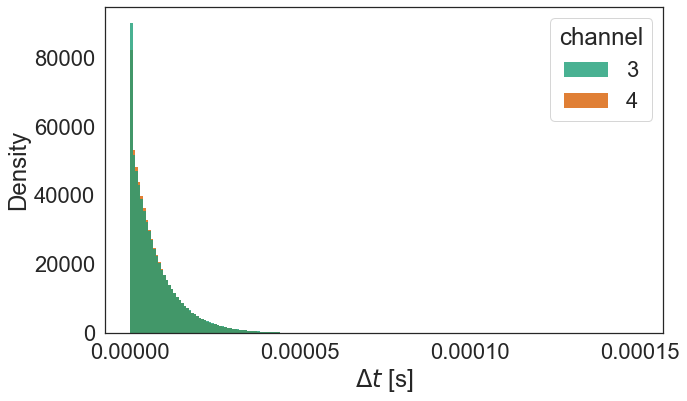

In [19]:
fig,ax=plt.subplots(figsize=(10,6))
sns.histplot(data = df, x = 'time', ax=ax, hue = 'channel', alpha=0.8, lw=0,
            bins=200, palette='Dark2', stat='density')
            
ax.set_xlabel(r'$\Delta t$ [s]')
ax.set_xticks(np.linspace(0, 0.00015, 4))
figpath = 'mixed_hv_noncleaned_hist.pdf'
fig.savefig(figpath, bbox_inches='tight')